# Menon Labs: Spotify Initial Data Analysis - Saving and Porting ML Model

### **Collaborators** 
- Ashna Sood 
- Shubhum Agrawal
- Shania Sinha
- Sergio Vazquez
- Rohil Khatkhate
- Kerrn Reehal

In [1]:
# import statements
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import pickle

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.metrics import make_scorer, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [3]:
# read in labeled songs CSV file 
labeled_songs = pd.read_csv('final_labels.csv', index_col='id')
labeled_songs

,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo,cluster,emotion
id,,,,,,,,,,,,,
35mvY5S1H3J2QZyna3TFe0,positions,['Ariana Grande'],0.468000,0.737,0.802,0.000000,0.0931,0.0878,0.682,-4.771,144.015,0,Energetic
6Hj9jySrnFppAI0sEMCZpJ,Robbery,['Juice WRLD'],0.328000,0.685,0.692,0.000000,0.1530,0.0457,0.578,-5.122,159.966,0,Energetic
2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,['Travis Scott'],0.005130,0.834,0.730,0.000000,0.1240,0.2220,0.446,-3.714,155.008,0,Energetic
27X3qzgB0Show6qfw5wNOK,Esquema Preferido,"['DJ Ivis', 'Tarcísio do Acordeon']",0.256000,0.669,0.812,0.000000,0.0773,0.1100,0.917,-4.597,159.934,0,Energetic
2Y0wPrPQBrGhoLn14xRYCG,Come & Go (with Marshmello),"['Juice WRLD', 'Marshmello']",0.017200,0.625,0.814,0.000000,0.1580,0.0657,0.535,-5.181,144.991,0,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4qZq5qn0CSA6YF96OM5XVZ,Manifest- Manifest (2004),['Abuse'],0.000001,0.141,0.931,0.224000,0.3120,0.2010,0.613,-7.091,212.980,29,Powerful
6T0aBJyFi7U3zHuaYSMWIP,Bach Jao Mundeyo,['Sardool Sikander'],0.533000,0.658,0.852,0.000002,0.0582,0.3560,0.801,-7.159,183.985,29,Powerful
2n8nDfBot4MddUcUKoAqGz,Horseface,['Yea(H)'],0.004480,0.306,0.982,0.243000,0.1800,0.0416,0.558,-5.640,188.499,29,Powerful


In [4]:
# define X and y
X = labeled_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                            'speechiness', 'valence', 'loudness', 'tempo']]
y = labeled_songs.iloc[:, -1:]

In [5]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In the initial model comparison analysis, both models are loaded here to predict the emotion labels of new songs.

### SVM Model

In [2]:
# load the saved model from file
# saved model filename
pkl_filename = "final_SVM_model.pkl"
# Load the model
with open(pkl_filename, 'rb') as file:
    saved_svm_model = pickle.load(file)

In [6]:
# Use the loaded pickled model to make predictions
saved_svm_pred = saved_svm_model.predict(X_test)
saved_svm_pred

array(['Vulnerable', 'Chill', 'Chill', ..., 'Powerful', 'Calm',
       'Energetic'], dtype=object)

In [8]:
# saved model predictions vs actuals 
results_svm = pd.DataFrame(y_test)
results_svm["Predicted"] = saved_svm_pred
results_svm.columns = ["Actual", "Predicted"]
results_svm

,Actual,Predicted
id,,
6esGbk2B0kqtotCQK0x7TE,Vulnerable,Vulnerable
1q52l0ch8CeRTpawIH2Fk7,Chill,Chill
6I39hUKfIBsPBLX42jE3Dk,Sentimental,Chill
5Q9r4LgvVYlGCc6ADlTq4b,Sentimental,Sentimental
619EzYfuddORljiqdOUcCw,Wistful,Wistful
...,...,...
1zUKcPI4Zzs2R6iHqBAPTk,Chill,Powerful
4ZSZgfusOcVSxQ1oDEQiuO,Powerful,Powerful
2qv58BEjCxsKO55BpMwZ2W,Energetic,Powerful


In [9]:
# incorrectly identified songs 
incorrect_svm_results = results_svm.loc[results_svm["Actual"] != results_svm["Predicted"]]   
incorrect_svm_results

,Actual,Predicted
id,,
6I39hUKfIBsPBLX42jE3Dk,Sentimental,Chill
09rS5AY3IgWDvDua1XxfkK,Energetic,Vulnerable
67VvejLVTmuhBeAwJwtKkj,Chill,Vulnerable
3YFgwhMgGKo1hHXjh8YuqL,Upbeat,Energetic
5qmmudIxzlyn0w8KSxR2H3,Vulnerable,Chill
...,...,...
3Afl4I1Jaob45MMbpxQEyh,Vulnerable,Energetic
1V57UuyqNrHbzkDOjeEtuf,Upbeat,Energetic
6rtKl9jiKZnZicze5b8edh,Powerful,Sentimental


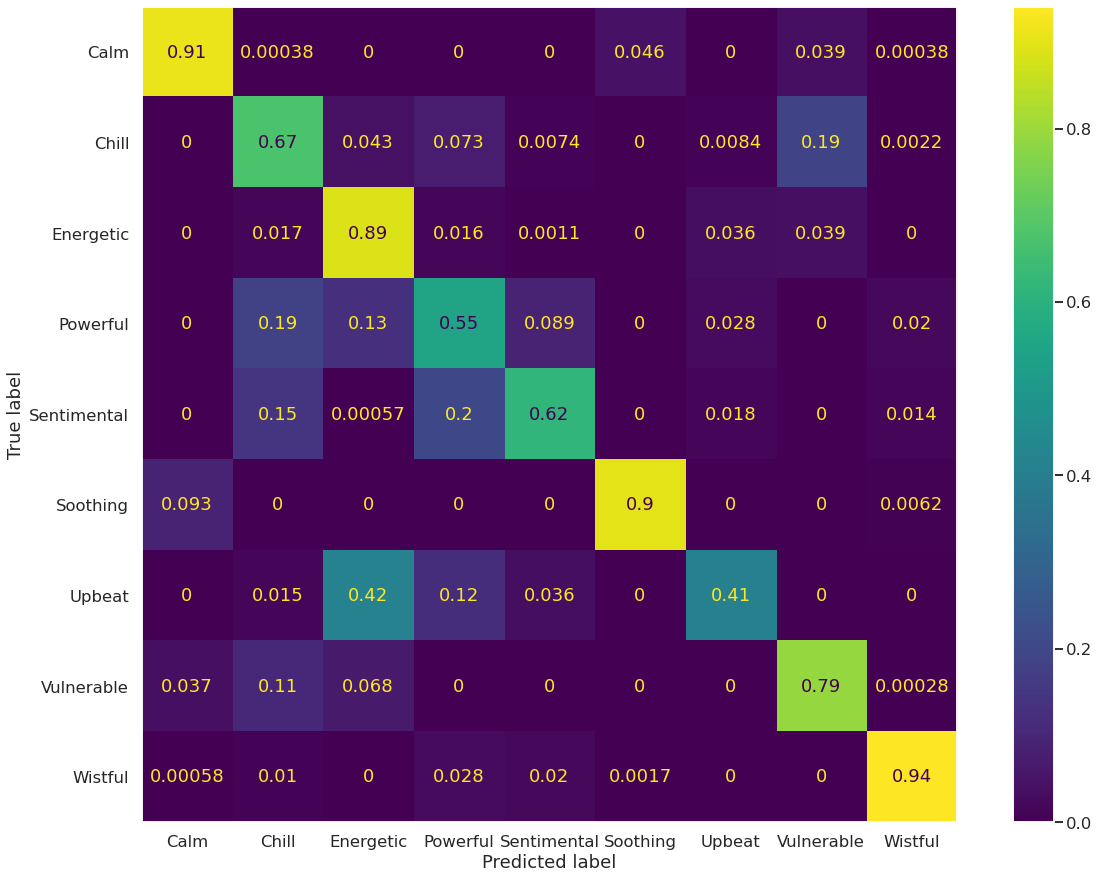

In [13]:
# caclulate confusion matrix to visualize TP, FP, TN, FN rates 
fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(saved_svm_model,X_test,y_test,normalize='true', ax=ax)
plt.grid(False)

### KNN Model

In [14]:
# load the saved model from file
# saved model filename
pkl_filename = "final_KNN_model.pkl"
# Load the model
with open(pkl_filename, 'rb') as file:
    saved_knn_model = pickle.load(file)

In [15]:
# Use the loaded pickled model to make predictions
saved_knn_pred = saved_knn_model.predict(X_test)
saved_knn_pred

array(['Vulnerable', 'Chill', 'Sentimental', ..., 'Energetic', 'Calm',
       'Energetic'], dtype=object)

In [16]:
# saved model predictions vs actuals 
results_knn = pd.DataFrame(y_test)
results_knn["Predicted"] = saved_knn_pred
results_knn.columns = ["Actual", "Predicted"]
results_knn

,Actual,Predicted
id,,
6esGbk2B0kqtotCQK0x7TE,Vulnerable,Vulnerable
1q52l0ch8CeRTpawIH2Fk7,Chill,Chill
6I39hUKfIBsPBLX42jE3Dk,Sentimental,Sentimental
5Q9r4LgvVYlGCc6ADlTq4b,Sentimental,Sentimental
619EzYfuddORljiqdOUcCw,Wistful,Wistful
...,...,...
1zUKcPI4Zzs2R6iHqBAPTk,Chill,Chill
4ZSZgfusOcVSxQ1oDEQiuO,Powerful,Powerful
2qv58BEjCxsKO55BpMwZ2W,Energetic,Energetic


In [17]:
# incorrectly identified songs 
incorrect_knn_results = results_knn.loc[results_knn["Actual"] != results_knn["Predicted"]]   
incorrect_knn_results

,Actual,Predicted
id,,
5qmmudIxzlyn0w8KSxR2H3,Vulnerable,Energetic
1qNvE50pMBAB11VtaGGkFD,Chill,Upbeat
0JKj6M3nKQ9QszjVkWCgF9,Wistful,Chill
6kfTpFW8sYPC1vyw78YRsA,Sentimental,Powerful
2tFkO2USQ1lWaSpp9oDC5L,Upbeat,Energetic
...,...,...
7rFC4ODFGcrWKvlP6uAAEz,Vulnerable,Energetic
2ufmtcIFdFpuUYBPXK5f67,Vulnerable,Energetic
1DPA5SfAMG67sENetBlEjy,Powerful,Wistful


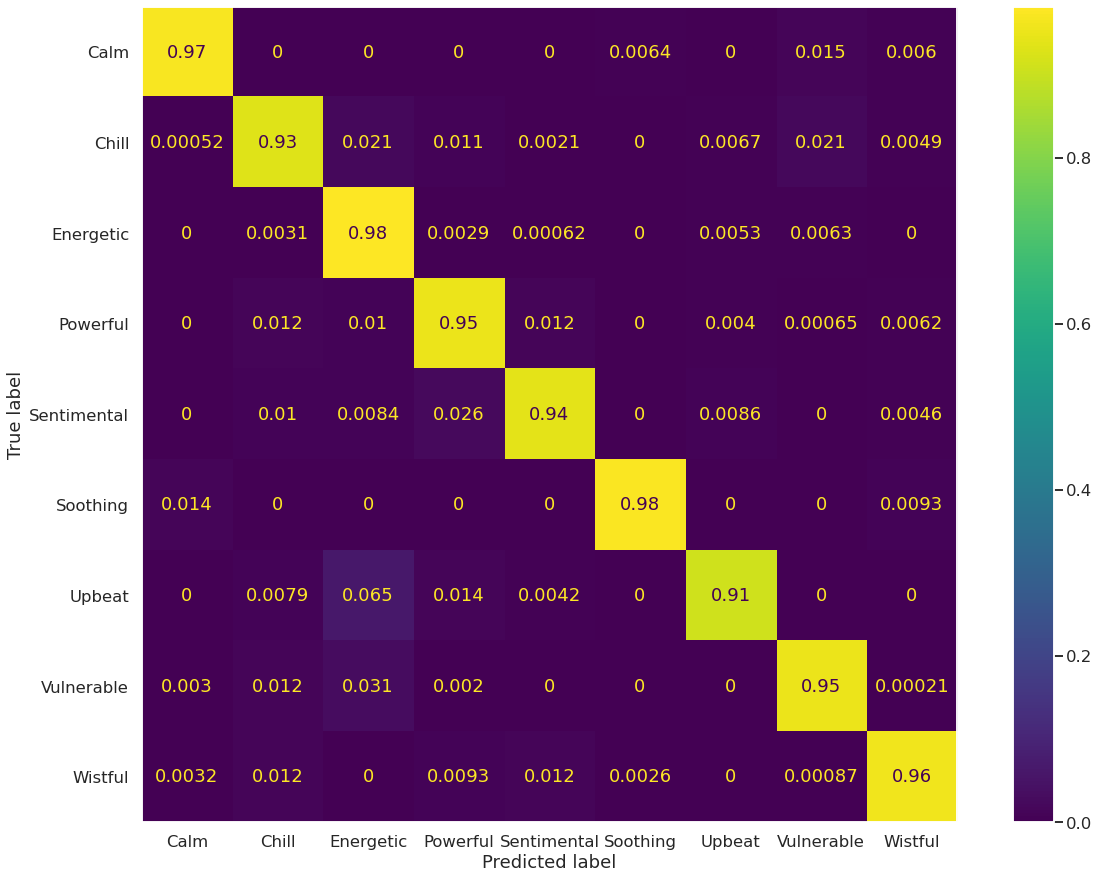

In [20]:
# caclulate confusion matrix to visualize TP, FP, TN, FN rates 
fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(saved_knn_model,X_test,y_test,normalize='true', ax=ax)
plt.grid(False)

Further comparison of models using predictions of labels of new songs.

In [27]:
# read in labeled songs csv file 
sample_songs = pd.read_csv('sample_songs_data.csv', index_col='id')
sample_songs

,acoousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo
id,,,,,,,,,
6hYvw3LLTViP2mT4MpDNmT,0.8820,0.4580,0.13700,0.000000,0.1500,0.0355,0.4370,-14.083,80.824
6CVOAQAtEUczusr91X6JGD,0.5370,0.4550,0.48000,0.000000,0.1500,0.0321,0.2030,-5.583,150.066
1smFN2CLqGROu0J0UyvDfL,0.7850,0.4830,0.46800,0.000000,0.1520,0.0341,0.3190,-7.642,135.864
6M2UnI1LnXuXlWU54CKmKx,0.0573,0.7780,0.81200,0.000008,0.2430,0.0460,0.7910,-8.561,99.962
2GTasAZimpxzNgE7aXFifI,0.0381,0.8370,0.83900,0.000193,0.3010,0.0468,0.6790,-5.548,107.025
12iG1bOj3EEaNF9E4VLW92,0.0943,0.6250,0.80200,0.000027,0.3380,0.0864,0.6010,-8.262,106.968
2OfMcYoNF73YslQJ7ru42n,0.9890,0.0856,0.00361,0.961000,0.1070,0.0488,0.0387,-36.470,78.132
0ileL1L3Vtpf5VZ5RQZ94m,0.8010,0.3490,0.30700,0.000000,0.0968,0.0402,0.4470,-7.197,80.964
2fVM2X8MHBmxMD9FLqjo4H,0.8080,0.7250,0.28500,0.000000,0.6430,0.0602,0.3060,-8.234,110.005


In [29]:
# Use the loaded pickled SVM model to make predictions
saved_svm_pred2 = saved_svm_model.predict(sample_songs)
saved_svm_pred2

array(['Vulnerable', 'Upbeat', 'Chill', 'Energetic', 'Energetic',
       'Energetic', 'Soothing', 'Vulnerable', 'Vulnerable', 'Vulnerable',
       'Vulnerable', 'Vulnerable', 'Chill', 'Energetic'], dtype=object)

In [28]:
# Use the loaded pickled KNN model to make predictions
saved_knn_pred2 = saved_knn_model.predict(sample_songs)
saved_knn_pred2

array(['Vulnerable', 'Upbeat', 'Chill', 'Energetic', 'Energetic',
       'Energetic', 'Soothing', 'Vulnerable', 'Vulnerable', 'Chill',
       'Vulnerable', 'Vulnerable', 'Chill', 'Energetic'], dtype=object)

Ultimately, the KNN model outperformed the SVM model with an accuracy of 94% and thus was chosen as the final model to predict the emotion label of songs. Now, the code will be converted to Javascript in order to be used in the product website.

### Sklearn Porter -- converting trained KNN Model to Javascript

In [40]:
!pip install sklearn-porter

     |████████████████████████████████| 144 kB 6.3 MB/s eta 0:00:01


In [43]:
from sklearn_porter import Porter
# port the trained KNN model code to Javascript 
porter = Porter(saved_knn_model, language='js')
# save converted code
output = porter.export()

In [46]:
# Save classifier into Javascript file
with open('KNN_Model.js', 'w') as f:
    f.write(output)